In [1]:
import sympy as sp
from sympt import *
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append("/home/leander/GoogleDriveSync/PhD/Python/")

from Elliptical_Well import EllipticalConfinement
from Cylindrical_Magnet import CylindricalMagnet, BLinear


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize


# Transparent background for figures but keep the legend background white but its text color black
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.shadow'] = False
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
# White spins, axis and ticks 
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

# Test effects of $x^n$

In [2]:
omega = sp.symbols('omega', real=True, positive=True)
omega_z = sp.symbols('omega_z', real=True, positive=True)
g = RDSymbol('g', real=True, positive=True, order=1)

spin = RDBasis('sigma', 2)
s0, sx, sy, sz = spin.basis

a = BosonOp('a')
ad = Dagger(a)

H = omega * ad * a + omega_z * sz + g * (ad + a)**3 * sx

EF = EffectiveFrame(H, subspaces=[spin])
EF.solve(max_order=2, method='FD')
EF.get_H()

The EffectiveFrame object has been initialized successfully.
Computing the effective Hamiltonian: 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]
The Hamiltonian has been solved successfully. Please use the get_H method to get the result in the desired form.
Converting to operator form: 100%|██████████| 2/2 [00:00<00:00, 17.36it/s]


omega*Dagger(a)*a + omega_z*sigma_3 + (-99*g**2*omega**3 + 108*g**2*omega*omega_z**2)/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4) + (-328*g**2*omega**2*omega_z + 160*g**2*omega_z**3)*sigma_3*(Dagger(a)*a)**3/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4) + (-174*g**2*omega**2*omega_z + 120*g**2*omega_z**3)*sigma_3/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4) + ((-270*g**2*omega**3 + 216*g**2*omega*omega_z**2)/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4) + (-512*g**2*omega**2*omega_z + 320*g**2*omega_z**3)*sigma_3/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4))*Dagger(a)*a + ((-270*g**2*omega**3 + 216*g**2*omega*omega_z**2)/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4) + (-492*g**2*omega**2*omega_z + 240*g**2*omega_z**3)*sigma_3/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4))*(Dagger(a)*a)**2

In [3]:
E0 = RDSymbol('E0', real=True, positive=True, order=1)
H_drive = E0 * (ad + a)
EF.rotate(H_drive)

Converting to operator form: 100%|██████████| 6/6 [00:00<00:00, 101.23it/s]


-6*E0*g*omega*sigma_1/(omega**2 - 4*omega_z**2) - 12*E0*g*omega*sigma_1*Dagger(a)*a/(omega**2 - 4*omega_z**2) + E0*Dagger(a) + E0*a + (-48*I*E0*g*omega**2*omega_z*sigma_2/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4) + (18*E0*g*omega**3 + 24*E0*g*omega*omega_z**2)*sigma_1/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4))*Dagger(a)**2 + (48*I*E0*g*omega**2*omega_z*sigma_2/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4) + (18*E0*g*omega**3 + 24*E0*g*omega*omega_z**2)*sigma_1/(9*omega**4 - 40*omega**2*omega_z**2 + 16*omega_z**4))*a**2

In [4]:
apply_commutation_relations(EF._EffectiveFrame__Vs[1], EF.commutation_relations).simplify()

# Effective Model

In [5]:
H_conf = EllipticalConfinement()
H_conf.H

hbar*omega_x*(k_+*(1/2 + Dagger(a_+)*a_+) + k_-*(1/2 + Dagger(a_-)*a_-))

In [6]:
H_conf.px.subs(H_conf.position_momentum_to_new_basis)

-hbar*sqrt(k_-**2 + 1)*sin(theta)*(Dagger(a_-) + a_-)/(2*sqrt(k_-)*l_x) - I*hbar*sqrt(k_+**2 + 1)*cos(theta)*(-Dagger(a_+) + a_+)/(2*sqrt(k_+)*l_x)

In [27]:
integral_expansion_order = 3
taylor_expansion_orders = [3, 3, 2] # x, y, z

x, y = sp.symbols('x y', real=True)
r_QD = sp.Matrix([x, y, 0])

Dx, Dy, Dz = sp.symbols('Delta_x Delta_y Delta_z', real=True)
R, L = sp.symbols('R L', real=True)
Skyrmion = CylindricalMagnet(R, L, sp.Matrix([Dx, Dy, Dz]))
Skyrmion.B0 = 1

Dr = RDSymbol('Delta_r', real=True, order=1)
phi = sp.symbols('phi', real=True)

Bx, By, Bz = Skyrmion.B_integral_expansion(r_QD, order=integral_expansion_order)
Bx = Bx.subs({Dx: Dr*sp.cos(phi), Dy: Dr*sp.sin(phi)})
By = By.subs({Dx: Dr*sp.cos(phi), Dy: Dr*sp.sin(phi)})
Bz = Bz.subs({Dx: Dr*sp.cos(phi), Dy: Dr*sp.sin(phi)})

In [28]:
print('Bx')    
Bx_linear = BLinear(Bx, taylor_expansion_orders[0], [x, y], [0, 0], 'b_x', {x: H_conf.x, y: H_conf.y}, symbol_orders=1)
print('By')
By_linear = BLinear(By, taylor_expansion_orders[1], [x, y], [0, 0], 'b_y', {x: H_conf.x, y: H_conf.y}, symbol_orders=1)
print('Bz')
Bz_linear = BLinear(Bz, taylor_expansion_orders[2], [x, y], [0, 0], 'b_z', {x: H_conf.x, y: H_conf.y}, symbol_orders=1)

print('Done')

Bx
By
Bz
Done


In [32]:
Bx_linear.get(2)

{b_x}^{(x**2)}*x**2 + 2*{b_x}^{(x*y)}*y*x + {b_x}^{(y**2)}*y**2

# Skyrmion Centered plus small displacement

In [ ]:
Spin = RDBasis('sigma', dim=2)
s0, sx, sy, sz = Spin.basis
spin_vector = sp.Matrix([sx, sy, sz])

max_order = 3

kB = RDSymbol('k_B', real=True, positive=True)                 # External magnetic field
kB0 = RDSymbol('k_{B_0}', real=True, positive=True)            # Magnetic field of the Skyrmion
kM_z = RDSymbol('k_{M_z}', real=True, positive=True, order=1)  # Magnetization of the material

omegax_total = sp.Add(*[kB0 * H_conf.lx**(-order) * Bx_linear.get(order)  for order in range(max_order + 1)])
omegay_total = sp.Add(*[kB0 * H_conf.lx**(-order) * By_linear.get(order)  for order in range(max_order + 1)])
omegaz_total = sp.Add(-kB, -kM_z, *[kB0 * H_conf.lx**(order) * Bz_linear.get(order) for order in range(max_order + 1)])

omega_total = H_conf.omega_x * sp.Matrix([omegax_total, omegay_total, omegaz_total])

H_Zeeman = - sp.Rational(1, 2) * hbar * spin_vector.dot(omega_total)
H_Zeeman


H = (H_conf.H + H_Zeeman.subs({x: H_conf.x, y: H_conf.y, Dr: H_conf.lx * Dr}).subs(H_conf.position_momentum_to_new_basis)) / (hbar * H_conf.omega_x)
display_dict(group_by_operators(H))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
Eff_frame = EffectiveFrame(H, subspaces=[Spin])
Eff_frame.solve(max_order=4, method='FD')

The EffectiveFrame object has been initialized successfully.
Computing the effective Hamiltonian: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]
The Hamiltonian has been solved successfully. Please use the get_H method to get the result in the desired form.


In [ ]:
H_eff = Eff_frame.get_H('operator')

Converting to operator form:   0%|          | 0/4 [00:00<?, ?it/s]

Converting to operator form: 100%|██████████| 4/4 [00:15<00:00,  3.81s/it]


In [ ]:
k_3 = sp.symbols('k_3', real=True, positive=True)

subs_dict = {
    (-H_conf.kp + kB)*(H_conf.kp + kB): -(H_conf.kp**2 - kB**2),
    (-H_conf.km + kB)*(H_conf.km + kB): -(H_conf.km**2 - kB**2),

}

symbols_x = []
for b_linear in Bx_linear_Dr:
    symbols_x += list(b_linear.B_linear_values.keys())

symbols_y = []
for b_linear in By_linear_Dr:
    symbols_y += list(b_linear.B_linear_values.keys())

symbols_z = []
for b_linear in Bz_linear_Dr:
    symbols_z += list(b_linear.B_linear_values.keys())
    
H_correction_dict = [{k:sp.Add(*[term.factor().subs(H_conf.trig_subs).simplify().subs(H_conf.kp**2 - H_conf.km**2, k_3**2).collect(k_3).subs(H_conf.kp*H_conf.km, H_conf.ky).collect( H_conf.ky).subs(subs_dict)
                         for term in v.collect(list(H_conf.trig_subs.keys())).as_ordered_terms()]).collect(symbols_x).collect(symbols_y).collect(symbols_z).subs(H_conf.eccentricity**2 + k_3**2, k_3**2*(1 + H_conf.eccentricity**2/k_3**2)).subs(H_conf.eccentricity**2 - k_3**2, -k_3**2*(1 - H_conf.eccentricity**2/k_3**2)).subs(H_conf.ky, H_conf.kp * H_conf.km) for k, v in group_by_operators(Eff_frame.H_corrections.get(order)).items()} for order in [1, 3, 4]]



display_dict(H_correction_dict[0])

<IPython.core.display.Math object>

In [ ]:
E0 = RDSymbol('E_0', real=True, positive=True, order=1)

m_sym = sp.symbols('m', real=True, positive=True)
e_sym = sp.symbols('e', real=True, positive=True)

lE = sp.symbols('l_E', real=True, positive=True)

E0_vals = {
    E0 : hbar ** 2/ (2 * m_sym * e_sym * lE**3)
}

omega_D = sp.symbols('omega_D', real=True, positive=True)
H_drive = - E0 * e_sym * sp.cos(omega_D * t) * H_conf.x.subs(H_conf.position_momentum_to_new_basis)


H_drive_eff = Eff_frame.rotate(H_drive, max_order=3)

Rotating the expression:   0%|          | 0/3 [00:00<?, ?it/s]

Converting to operator form: 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]


In [ ]:
group_by_operators(sp.Add(*[term.factor().subs(H_conf.trig_subs) for term in H_drive_eff.subs({
    H_conf.a_m : 0,
    H_conf.a_p : 0,
    H_conf.ad_m : 0,
    H_conf.ad_p : 0,
}).expand().as_ordered_terms()]))[sx].factor().subs(H_conf.kp*H_conf.km, H_conf.ky).subs(H_conf.eccentricity_to_ky).expand().factor().subs(H_conf.ky, H_conf.kp*H_conf.km).subs(((H_conf.kp**2 + 1)*(H_conf.km**2 + 1)).expand(), (H_conf.kp**2 + 1)*(H_conf.km**2 + 1)).factor().subs(H_conf.kp*H_conf.km, H_conf.ky).subs(H_conf.ky_to_eccentricity).expand().factor().subs({
    (-kB + H_conf.kp)*(kB + H_conf.kp): -kB**2 + H_conf.kp**2,
    (-kB + H_conf.km)*(kB + H_conf.km): -kB**2 + H_conf.km**2,
}).collect(symbols_x).subs(E0_vals)

hbar**2*k_{B_0}*l_x*(-k_B*{b_y}^{(y)}*k_c + {b_x}^{(x)}*(k_B**2 + epsilon**2 - 1))*cos(t*omega_D)/(4*l_E**3*m*(-k_B**2 + k_+**2)*(-k_B**2 + k_-**2))

In [ ]:
subs_values = {}
for b_linear in Bx_linear_Dr:
    for k, v in b_linear.B_linear_values.items():
        subs_values[k] = v[0]

for b_linear in By_linear_Dr:
    for k, v in b_linear.B_linear_values.items():
        subs_values[k] = v[0]

for b_linear in Bz_linear_Dr:
    for k, v in b_linear.B_linear_values.items():
        subs_values[k] = v[0]
        

Omega_z_eff = sp.Add(*[t[sz] for t in H_correction_dict]).subs(subs_values) * 2

In [ ]:
lx = 60 # nm

B_external = 100e-3#33e-3 # T
m0 = 9.1093837e-31 # kg electron massss
gamma = 0.19
m = m0 * gamma
e = 1.60217662e-19 # C electron charge

hbar = 1.0545718e-34 # Js
omega_x = hbar / (m * (lx * 1e-9)**2)
omega_c = -e * B_external / m

M = 1000_000 # A/m
mu_0 = 4 * np.pi * 1e-7
B0 = mu_0 * M / (4 * np.pi)

omega_B = e * B_external / m0
omega_B0 = e * B0 / m0

subs_values = {
    H_conf.eccentricity : 0,
    Dz : 1.7,
    L : 0.83,
    #R : 6 / lx,
    H_conf.kc : omega_c/omega_x,
    kB : omega_B / omega_x,
    kB0 : omega_B0 / omega_x,
    kM_z : 0,
}
print(omega_x / (2*np.pi) * 1e-9)
print(omega_B / (2*np.pi) * 1e-9)
display_dict(subs_values)


Omega_z_eff_val = sp.lambdify(R, Omega_z_eff.subs(k_3**2 , H_conf.kp**2 - H_conf.km**2).subs(H_conf.omega_pm_to_xyc_subs).subs(subs_values).evalf() / (2 * np.pi), 'numpy')
Omega_z_eff_val(R)

26.937121686440392
2.7992489632340907


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.00029453858005585*R**2*(-0.224273658633989*R/(0.223552358756825*R**2 + 1.0)**1.5 + R/(0.605610985783282*R**2 + 1.0)**1.5)**2 - 0.0330780930961775*R*(3.14159265358979/(R*(0.223552358756825*R**2 + 1.0)**0.5) - 3.14159265358979/(R*(0.605610985783282*R**2 + 1.0)**0.5)) - 0.200474699198521*(R**2*(R**(-4.0) + 0.0187408714146526/(0.223552358756825*R**2 + 1.0)**2 + 2.0/(R**2*(4.0*R**2 + 17.8929))) - 2.0/(4.0*R**2 + 17.8929) - 1/R**2)/(0.223552358756825*R**2 + 1.0)**0.5 + 0.200474699198521*(R**2*(R**(-4.0) + 0.137536749788025/(0.605610985783282*R**2 + 1.0)**2 + 2.0/(R**2*(4.0*R**2 + 6.6049))) - 2.0/(4.0*R**2 + 6.6049) - 1/R**2)/(0.605610985783282*R**2 + 1.0)**0.5

In [ ]:
sp.Add(*[t[sz] for t in H_correction_dict]).subs(kM_z, 0).subs(k_3**2 , H_conf.kp**2 - H_conf.km**2).subs(H_conf.omega_pm_to_xyc_subs).subs(subs_values)

-0.000157987784306184*{b_x}^{(x)}**2 + 0.00073807141847986*{b_x}^{(x)}*{b_y}^{(y)} - 0.000157987784306184*{b_y}^{(y)}**2 - 0.0519589471328553*{b_z}^{(1)} - 0.0250593373998151*{b_z}^{(x**2)} - 0.0250593373998151*{b_z}^{(y**2)}

In [ ]:
bx = list(Bx_linear.B_linear_values.values())[0][0]
bx_symbol = list(Bx_linear.B_linear_values.keys())[0]
by = list(By_linear.B_linear_values.values())[0][0]
by_symbol = list(By_linear.B_linear_values.keys())[0]
bz = list(Bz_linear.B_linear_values.values())[0][0]
bz_symbol = list(Bz_linear.B_linear_values.keys())[0]
bzxx = list(Bz_linear.B_linear_values.values())[1][0]
bzxx_symbol = list(Bz_linear.B_linear_values.keys())[1]
bzyy = list(Bz_linear.B_linear_values.values())[2][0]
bzyy_symbol = list(Bz_linear.B_linear_values.keys())[2]

b_sl = sp.symbols('b_sl', real=True, positive=True)
b_z_xx = sp.symbols('b_z^{(2)}', real=True, positive=True)


expr_delta_wz = sp.Add(*[t[sz] for t in H_correction_dict]).subs(kM_z, 0).subs(k_3**2 , H_conf.kp**2 - H_conf.km**2).subs({bx_symbol: b_sl, by_symbol: b_sl}).subs({bzxx_symbol: b_z_xx, bzyy_symbol: b_z_xx}).collect([b_sl, b_z_xx, bz_symbol]).subs(H_conf.omega_pm_to_xyc_subs).subs(subs_values)
expr_delta_wz


-0.0519589471328553*{b_z}^{(1)} + 0.000422095849867492*b_sl**2 - 0.0501186747996302*b_z^{(2)}

11.0949316225318*sqrt({b_z}^{(1)} + 0.964582185845305*b_z^{(2)})

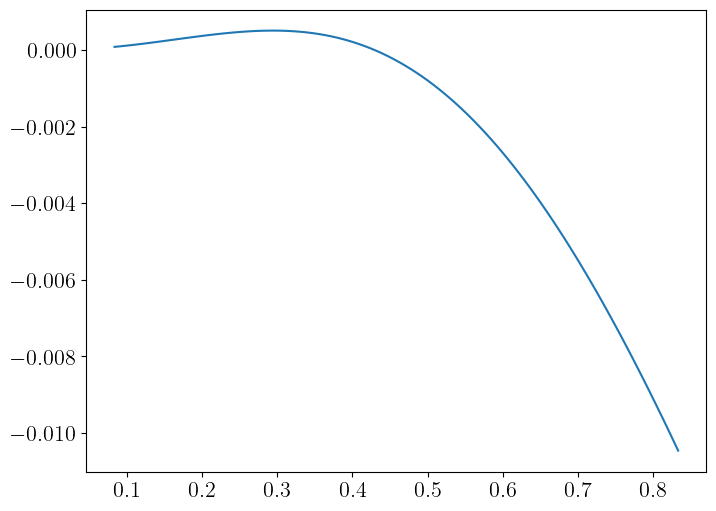

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

Rs = np.linspace(5, 50, 100) / lx
ax.plot(Rs, sp.lambdify(R, expr_delta_wz.subs({b_sl: bx, b_z_xx: bzxx, bz_symbol:bz}).subs(subs_values), 'numpy')(Rs), label=r'$\Delta \omega_z$')

2.826584876168567 2.2357958325195053


Text(0, 0.5, '$\\delta{\\omega_z}(R)$ [MHz]')

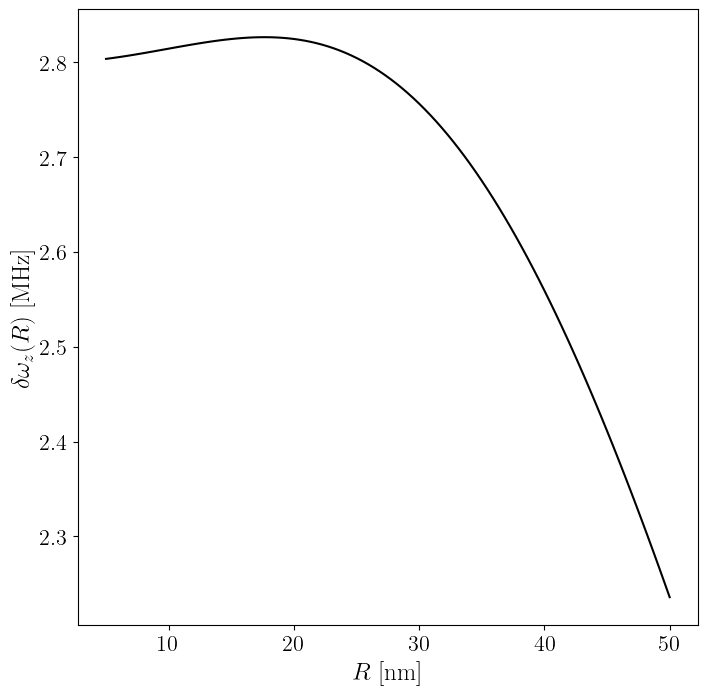

In [ ]:
# recet plt rcParams
plt.rcdefaults()


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize


fig, ax = plt.subplots(figsize=(8, 8))

Rs = np.linspace(5, 50, 100) / lx
Omega_z_eff_vals = Omega_z_eff_val(Rs)
print(np.max(((Omega_z_eff_vals * omega_x) + omega_B/(2*np.pi)) * 1e-9), np.min(((Omega_z_eff_vals * omega_x) + omega_B/(2*np.pi)) * 1e-9))
ax.plot(Rs * lx, ((Omega_z_eff_vals * omega_x) + omega_B/(2*np.pi)) * 1e-9, color='black')
ax.set_xlabel(r'$R$ [nm]')
ax.set_ylabel(r'$\delta{\omega_z}(R)$ [MHz]')